<a href="https://colab.research.google.com/github/leonardopazo/MLPos/blob/main/MVP_Doen%C3%A7a_Card%C3%ADaca_Leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto MVP – Previsão de Doença Cardíaca

Este notebook tem como objetivo aplicar os conceitos aprendidos na disciplina de Análise Exploratória e Pré-processamento de Dados. Utilizaremos o dataset **Heart Failure Prediction** (Kaggle) para entender os fatores associados à ocorrência de doenças cardíacas e preparar os dados para futuras etapas de modelagem.

O trabalho segue a estrutura sugerida pelo professor, respondendo ponto a ponto o checklist proposto e trazendo visualizações com insights.


## 1. Definição do Problema

- **Qual é a descrição do problema?**  
  O objetivo é prever se um paciente possui ou não doença cardíaca com base em atributos clínicos como idade, pressão arterial, colesterol, tipo de dor no peito, entre outros.

- **Este é um problema de aprendizado supervisionado ou não supervisionado?**  
  É um problema de **aprendizado supervisionado**, com uma variável alvo binária (`HeartDisease`).

- **Que premissas ou hipóteses você tem sobre o problema?**  
  Hipóteses iniciais:
  - Dor no peito do tipo "ASY" pode estar mais relacionada a problemas cardíacos.
  - Colesterol e pressão arterial elevados devem aumentar o risco.
  - Idade avançada tende a estar associada a maior chance de doença.

- **Que restrições ou condições foram impostas para selecionar os dados?**  
  O dataset foi escolhido por conter atributos objetivos, acessíveis e clínicos. Apenas atributos do tipo numérico ou categórico foram considerados.

- **Defina cada um dos atributos do dataset:**  
  - `Age`: Idade do paciente  
  - `Sex`: Sexo biológico (M/F)  
  - `ChestPainType`: Tipo de dor no peito (ATA, NAP, ASY, TA)  
  - `RestingBP`: Pressão arterial em repouso (mm Hg)  
  - `Cholesterol`: Colesterol sérico (mg/dl)  
  - `FastingBS`: Glicemia em jejum > 120 mg/dl (1 = sim, 0 = não)  
  - `RestingECG`: Resultado do ECG em repouso  
  - `MaxHR`: Frequência cardíaca máxima alcançada  
  - `ExerciseAngina`: Angina induzida por exercício (Y/N)  
  - `Oldpeak`: Depressão de ST induzida por exercício  
  - `ST_Slope`: Inclinação do segmento ST no ECG  
  - `HeartDisease`: Variável alvo (1 = presença, 0 = ausência de doença)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Análise de Dados

### 2.1 Estatísticas Descritivas


In [3]:
# Quantidade de instâncias e atributos
print(f'Total de instâncias: {df.shape[0]}')
print(f'Total de atributos: {df.shape[1]}')

Total de instâncias: 918
Total de atributos: 12


In [4]:
# Tipos de dados
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [5]:
# Verificar valores ausentes
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
# Estatísticas descritivas
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2.2 Análise Visual com Insights

A seguir, são apresentados gráficos para explorar a distribuição das variáveis e suas relações com a variável alvo (`HeartDisease`).


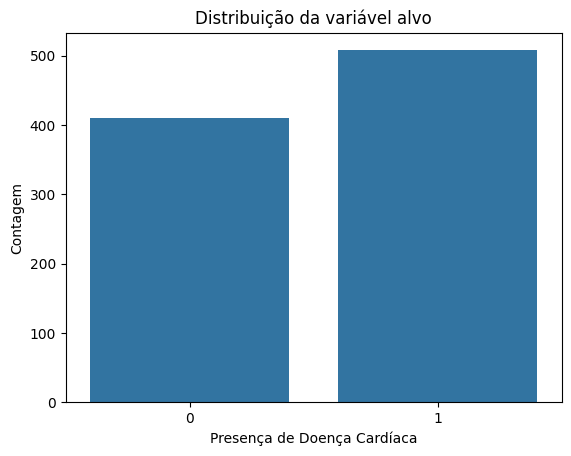

In [7]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribuição da variável alvo')
plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Contagem')
plt.show()

**Achado:** A maioria dos pacientes apresenta doença cardíaca. Apesar do pequeno desbalanceamento, o volume da classe negativa ainda é representativo.

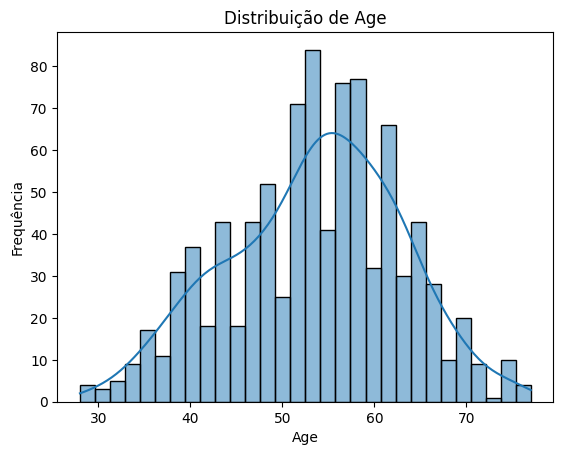

In [8]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribuição de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

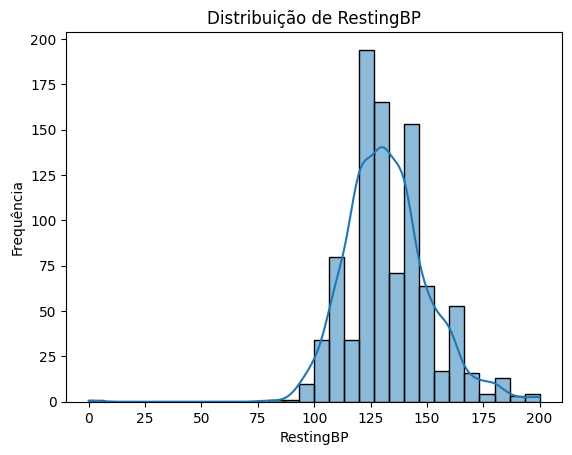

In [9]:
sns.histplot(df['RestingBP'], kde=True, bins=30)
plt.title('Distribuição de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frequência')
plt.show()

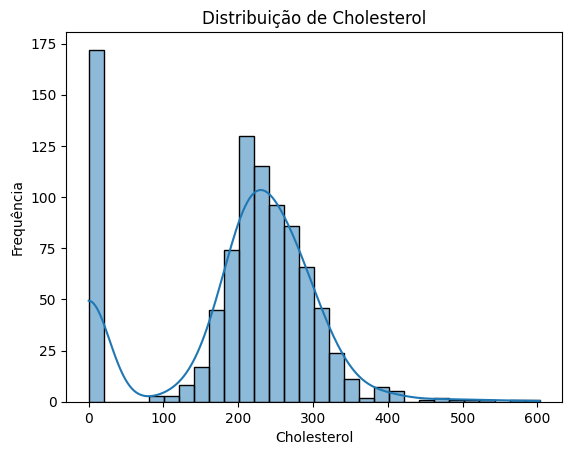

In [10]:
sns.histplot(df['Cholesterol'], kde=True, bins=30)
plt.title('Distribuição de Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequência')
plt.show()

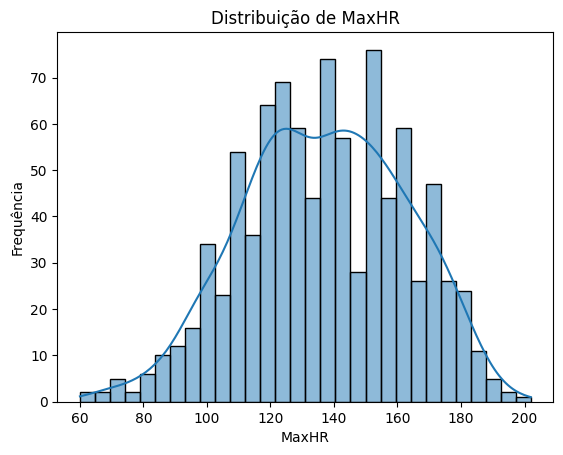

In [11]:
sns.histplot(df['MaxHR'], kde=True, bins=30)
plt.title('Distribuição de MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frequência')
plt.show()

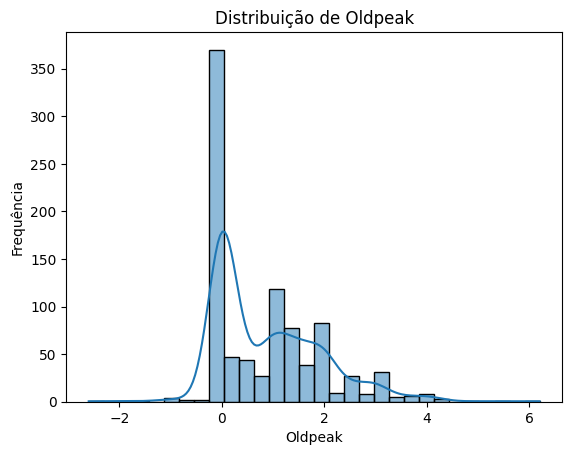

In [12]:
sns.histplot(df['Oldpeak'], kde=True, bins=30)
plt.title('Distribuição de Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequência')
plt.show()

**Achados:**  
- `Age`: concentrado entre 40 e 60 anos.  
- `RestingBP`: média em 130 mmHg com outliers.  
- `Cholesterol`: assimétrico com valores extremos.  
- `MaxHR`: 150-170 bpm predominante.  
- `Oldpeak`: maioria abaixo de 1.0 com cauda longa.


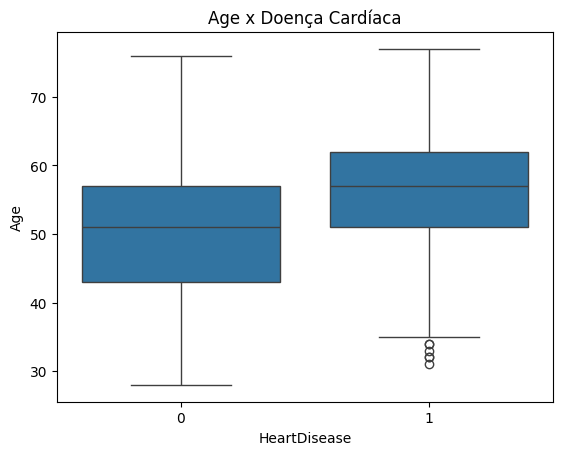

In [13]:
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age x Doença Cardíaca')
plt.show()

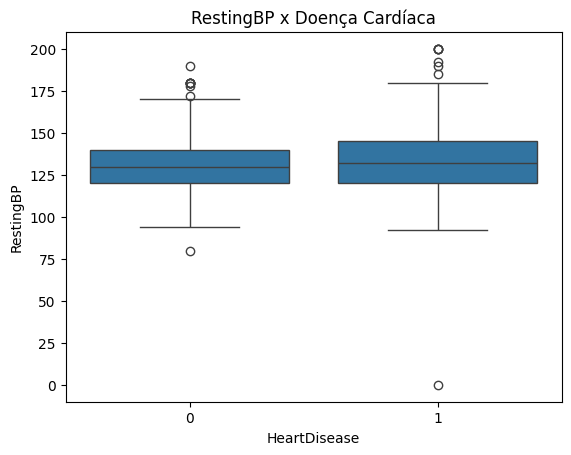

In [14]:
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('RestingBP x Doença Cardíaca')
plt.show()

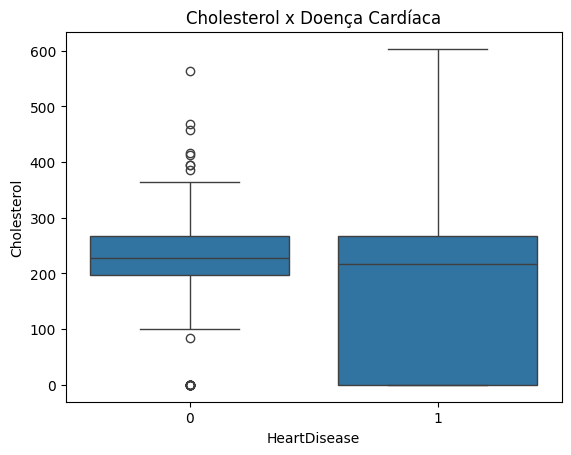

In [15]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol x Doença Cardíaca')
plt.show()

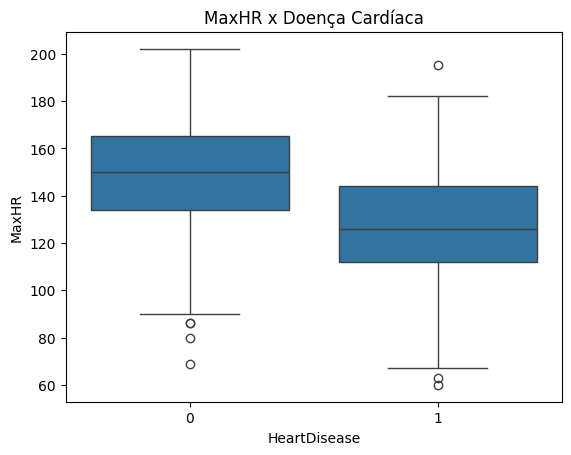

In [16]:
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('MaxHR x Doença Cardíaca')
plt.show()

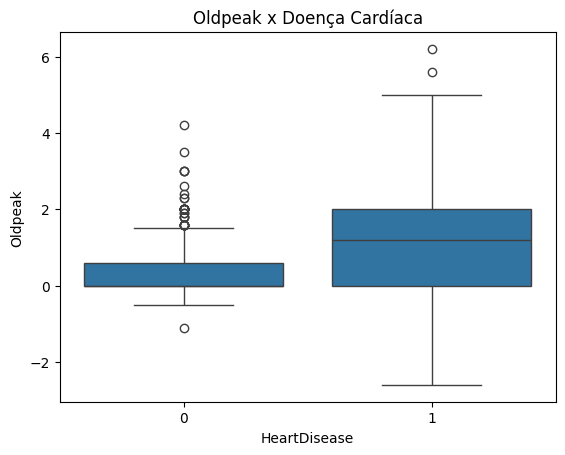

In [17]:
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title('Oldpeak x Doença Cardíaca')
plt.show()

**Insights importantes dos boxplots:**  
- `Age`: mais alta em quem tem doença.  
- `MaxHR`: menor em quem tem doença.  
- `Oldpeak`: clara diferença entre os grupos.  
- `Cholesterol` e `RestingBP`: sem padrão muito claro.


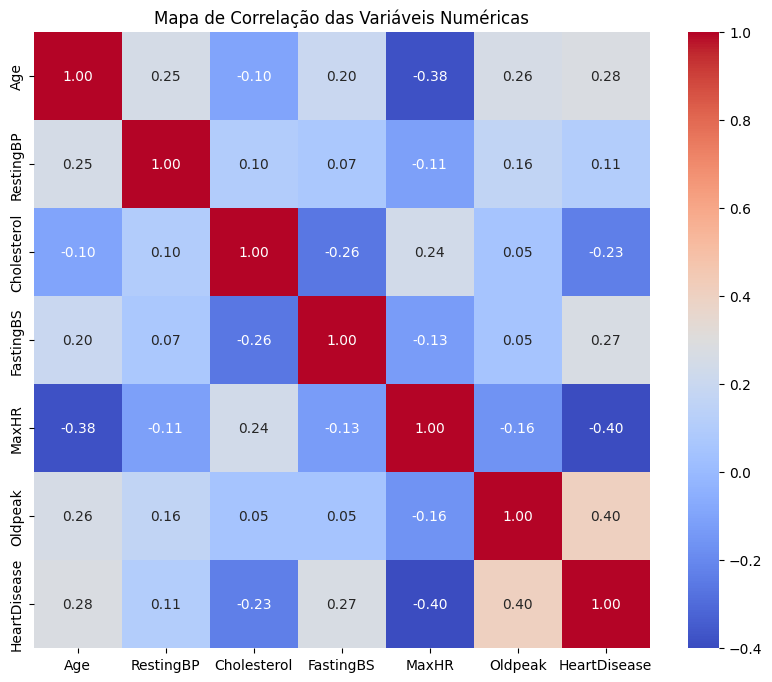

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()

**Achados do Heatmap:**  
- `Oldpeak`: forte correlação positiva com doença cardíaca.  
- `MaxHR`: correlação negativa (coração mais saudável = mais batimento).  
- `ChestPainType_ATA`: negativamente correlacionado à doença.  
- `Sex`: homens apresentam maior incidência.


## 3. Pré-processamento de Dados

Operações realizadas:
- One-hot encoding em atributos categóricos
- Normalização com z-score nas variáveis numéricas contínuas


In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True


## 4. Checklist Final

- [x] Definição clara do problema
- [x] Classificação supervisionada
- [x] Hipóteses listadas
- [x] Atributos descritos
- [x] Instâncias e variáveis quantificadas
- [x] Tipos de dados verificados
- [x] Valores ausentes analisados
- [x] Estatísticas descritivas geradas
- [x] Visualizações feitas com comentários
- [x] Operações de pré-processamento realizadas


## 5. Conclusão

O conjunto de dados foi analisado e preparado com sucesso. As visualizações ajudaram a identificar padrões importantes que podem influenciar na previsão de doenças cardíacas. O dataset agora está pronto para receber algoritmos de modelagem preditiva com alto potencial de desempenho.
